<a href="https://colab.research.google.com/github/MDAyesha/IMDB-prediction/blob/main/BLE_RSSI_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
f1=files.upload()

Saving iBeacon_RSSI_Labeled.csv to iBeacon_RSSI_Labeled.csv


**DATA PREPROCESSING**

---



In [2]:
import pandas as pd
df=pd.read_csv("iBeacon_RSSI_Labeled.csv")

In [3]:
df.shape

(1420, 15)

*Checking for missing values*

---


In [8]:
df.isna().sum()

location    0
date        0
b3001       0
b3002       0
b3003       0
b3004       0
b3005       0
b3006       0
b3007       0
b3008       0
b3009       0
b3010       0
b3011       0
b3012       0
b3013       0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   location  1420 non-null   object
 1   date      1420 non-null   object
 2   b3001     1420 non-null   int64 
 3   b3002     1420 non-null   int64 
 4   b3003     1420 non-null   int64 
 5   b3004     1420 non-null   int64 
 6   b3005     1420 non-null   int64 
 7   b3006     1420 non-null   int64 
 8   b3007     1420 non-null   int64 
 9   b3008     1420 non-null   int64 
 10  b3009     1420 non-null   int64 
 11  b3010     1420 non-null   int64 
 12  b3011     1420 non-null   int64 
 13  b3012     1420 non-null   int64 
 14  b3013     1420 non-null   int64 
dtypes: int64(13), object(2)
memory usage: 166.5+ KB


In [13]:
df.describe()

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
count,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000
mean,-197.825352,-156.623944,-175.533099,-164.534507,-178.378169,-175.063380,-195.637324,-191.970423,-197.145070,-197.442254,-197.748592,-197.233803,-196.065493
std,16.259105,60.217747,49.452958,56.523261,47.175799,49.596627,22.880980,30.733742,19.160207,17.741632,16.852535,18.541088,22.053924
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
50%,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
75%,-200.000000,-78.000000,-200.000000,-80.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
max,-67.000000,-59.000000,-56.000000,-56.000000,-60.000000,-62.000000,-58.000000,-56.000000,-55.000000,-61.000000,-59.000000,-60.000000,-59.000000


In [11]:
df.head()

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,O02,10-18-2016 11:15:21,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,P01,10-18-2016 11:15:19,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,P01,10-18-2016 11:15:17,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,P01,10-18-2016 11:15:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,P01,10-18-2016 11:15:13,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200


In [16]:
locations = df['location'][:]
dates = df['date'][:]
features = df.drop(['date','location'], axis = 1) #remove unwanted attributes from dataset

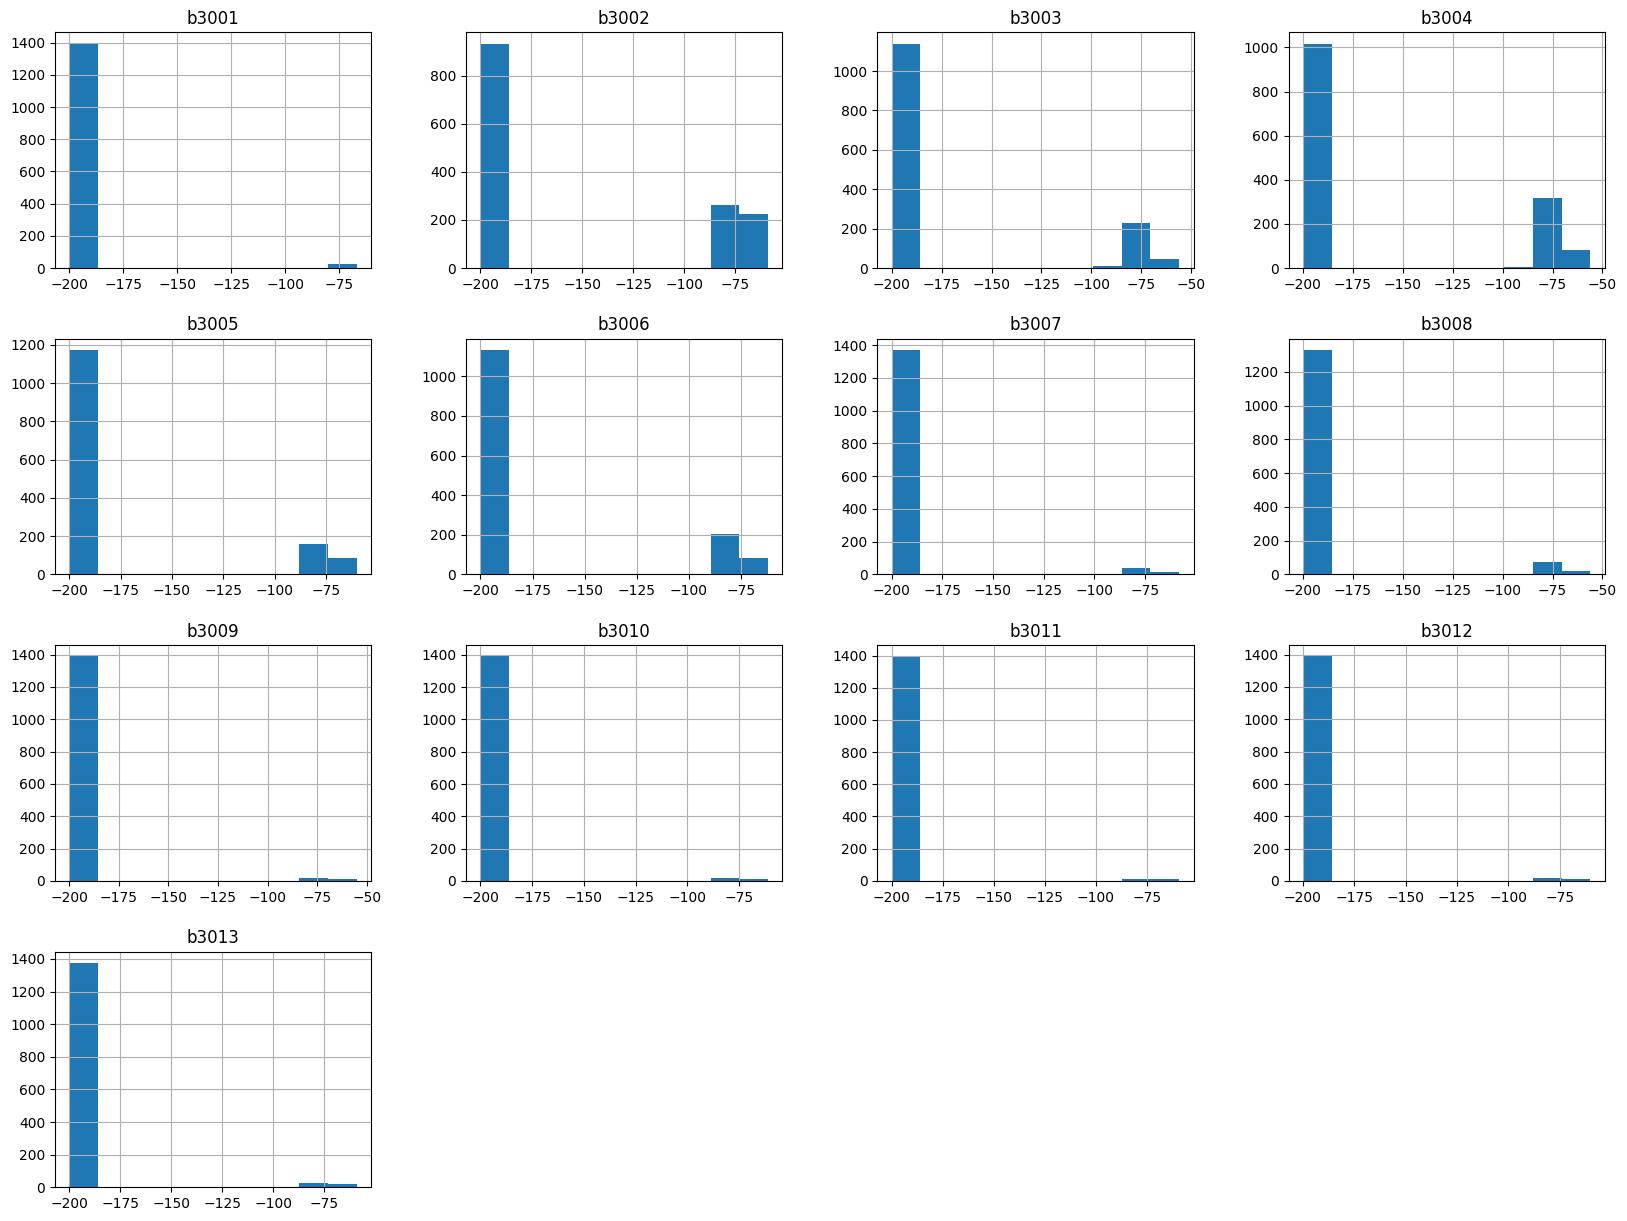

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt 
features.hist(figsize=(20,15))# Plotting all the beacons values 
#x axis = RSSI value
#y axis = number of data points at a perticular RSSI value
plt.savefig('Leabeled_beacons_Histograms.png')
plt.show()

In [19]:
locations.head(10)

0    O02
1    P01
2    P01
3    P01
4    P01
5    P01
6    P01
7    P02
8    R01
9    R01
Name: location, dtype: object

*Encoding Data*

---



In [18]:
from sklearn.preprocessing import OneHotEncoder
#Number the categories from 0 to 104
locations_encoded, locations_categories = pd.factorize(locations)
#One hot encoding
encoder = OneHotEncoder()
locations_1hot = encoder.fit_transform(locations_encoded.reshape(-1,1))
locations_categories 

Index(['O02', 'P01', 'P02', 'R01', 'R02', 'S01', 'S02', 'T01', 'U02', 'U01',
       ...
       'I15', 'S15', 'U15', 'V15', 'S07', 'S08', 'L09', 'L08', 'Q02', 'Q01'],
      dtype='object', length=105)

In [20]:
locations_1hot.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
#Correlation among the features
features.corr()

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
b3001,1.000000,-0.073123,-0.066219,-0.083980,0.103180,-0.043067,-0.025520,0.330190,-0.019943,-0.019296,-0.017881,-0.019969,-0.023878
b3002,-0.073123,1.000000,0.075160,-0.409673,0.054061,-0.210235,-0.115099,0.007335,-0.107406,-0.094341,-0.096299,-0.107542,-0.128599
b3003,-0.066219,0.075160,1.000000,-0.144218,-0.162481,0.135232,-0.047100,-0.123059,-0.073771,-0.071377,-0.066143,-0.073865,-0.088328
b3004,-0.083980,-0.409673,-0.144218,1.000000,-0.264527,-0.185911,0.070760,-0.158229,-0.093558,-0.090521,-0.083883,-0.093677,-0.112018
b3005,0.103180,0.054061,-0.162481,-0.264527,1.000000,0.010307,-0.068146,0.285083,-0.068340,-0.066122,-0.061273,-0.068427,-0.081825
b3006,-0.043067,-0.210235,0.135232,-0.185911,0.010307,1.000000,-0.074927,-0.068524,-0.074970,-0.049186,-0.067217,-0.075065,-0.089763
b3007,-0.025520,-0.115099,-0.047100,0.070760,-0.068146,-0.074927,1.000000,-0.049850,-0.028430,-0.027507,-0.025490,-0.028466,-0.034040
b3008,0.330190,0.007335,-0.123059,-0.158229,0.285083,-0.068524,-0.049850,1.000000,-0.038956,0.103724,-0.034928,0.001415,-0.046643
b3009,-0.019943,-0.107406,-0.073771,-0.093558,-0.068340,-0.074970,-0.028430,-0.038956,1.000000,0.073096,-0.019920,-0.022246,-0.026601
b3010,-0.019296,-0.094341,-0.071377,-0.090521,-0.066122,-0.049186,-0.027507,0.103724,0.073096,1.000000,0.254659,0.040681,0.026559


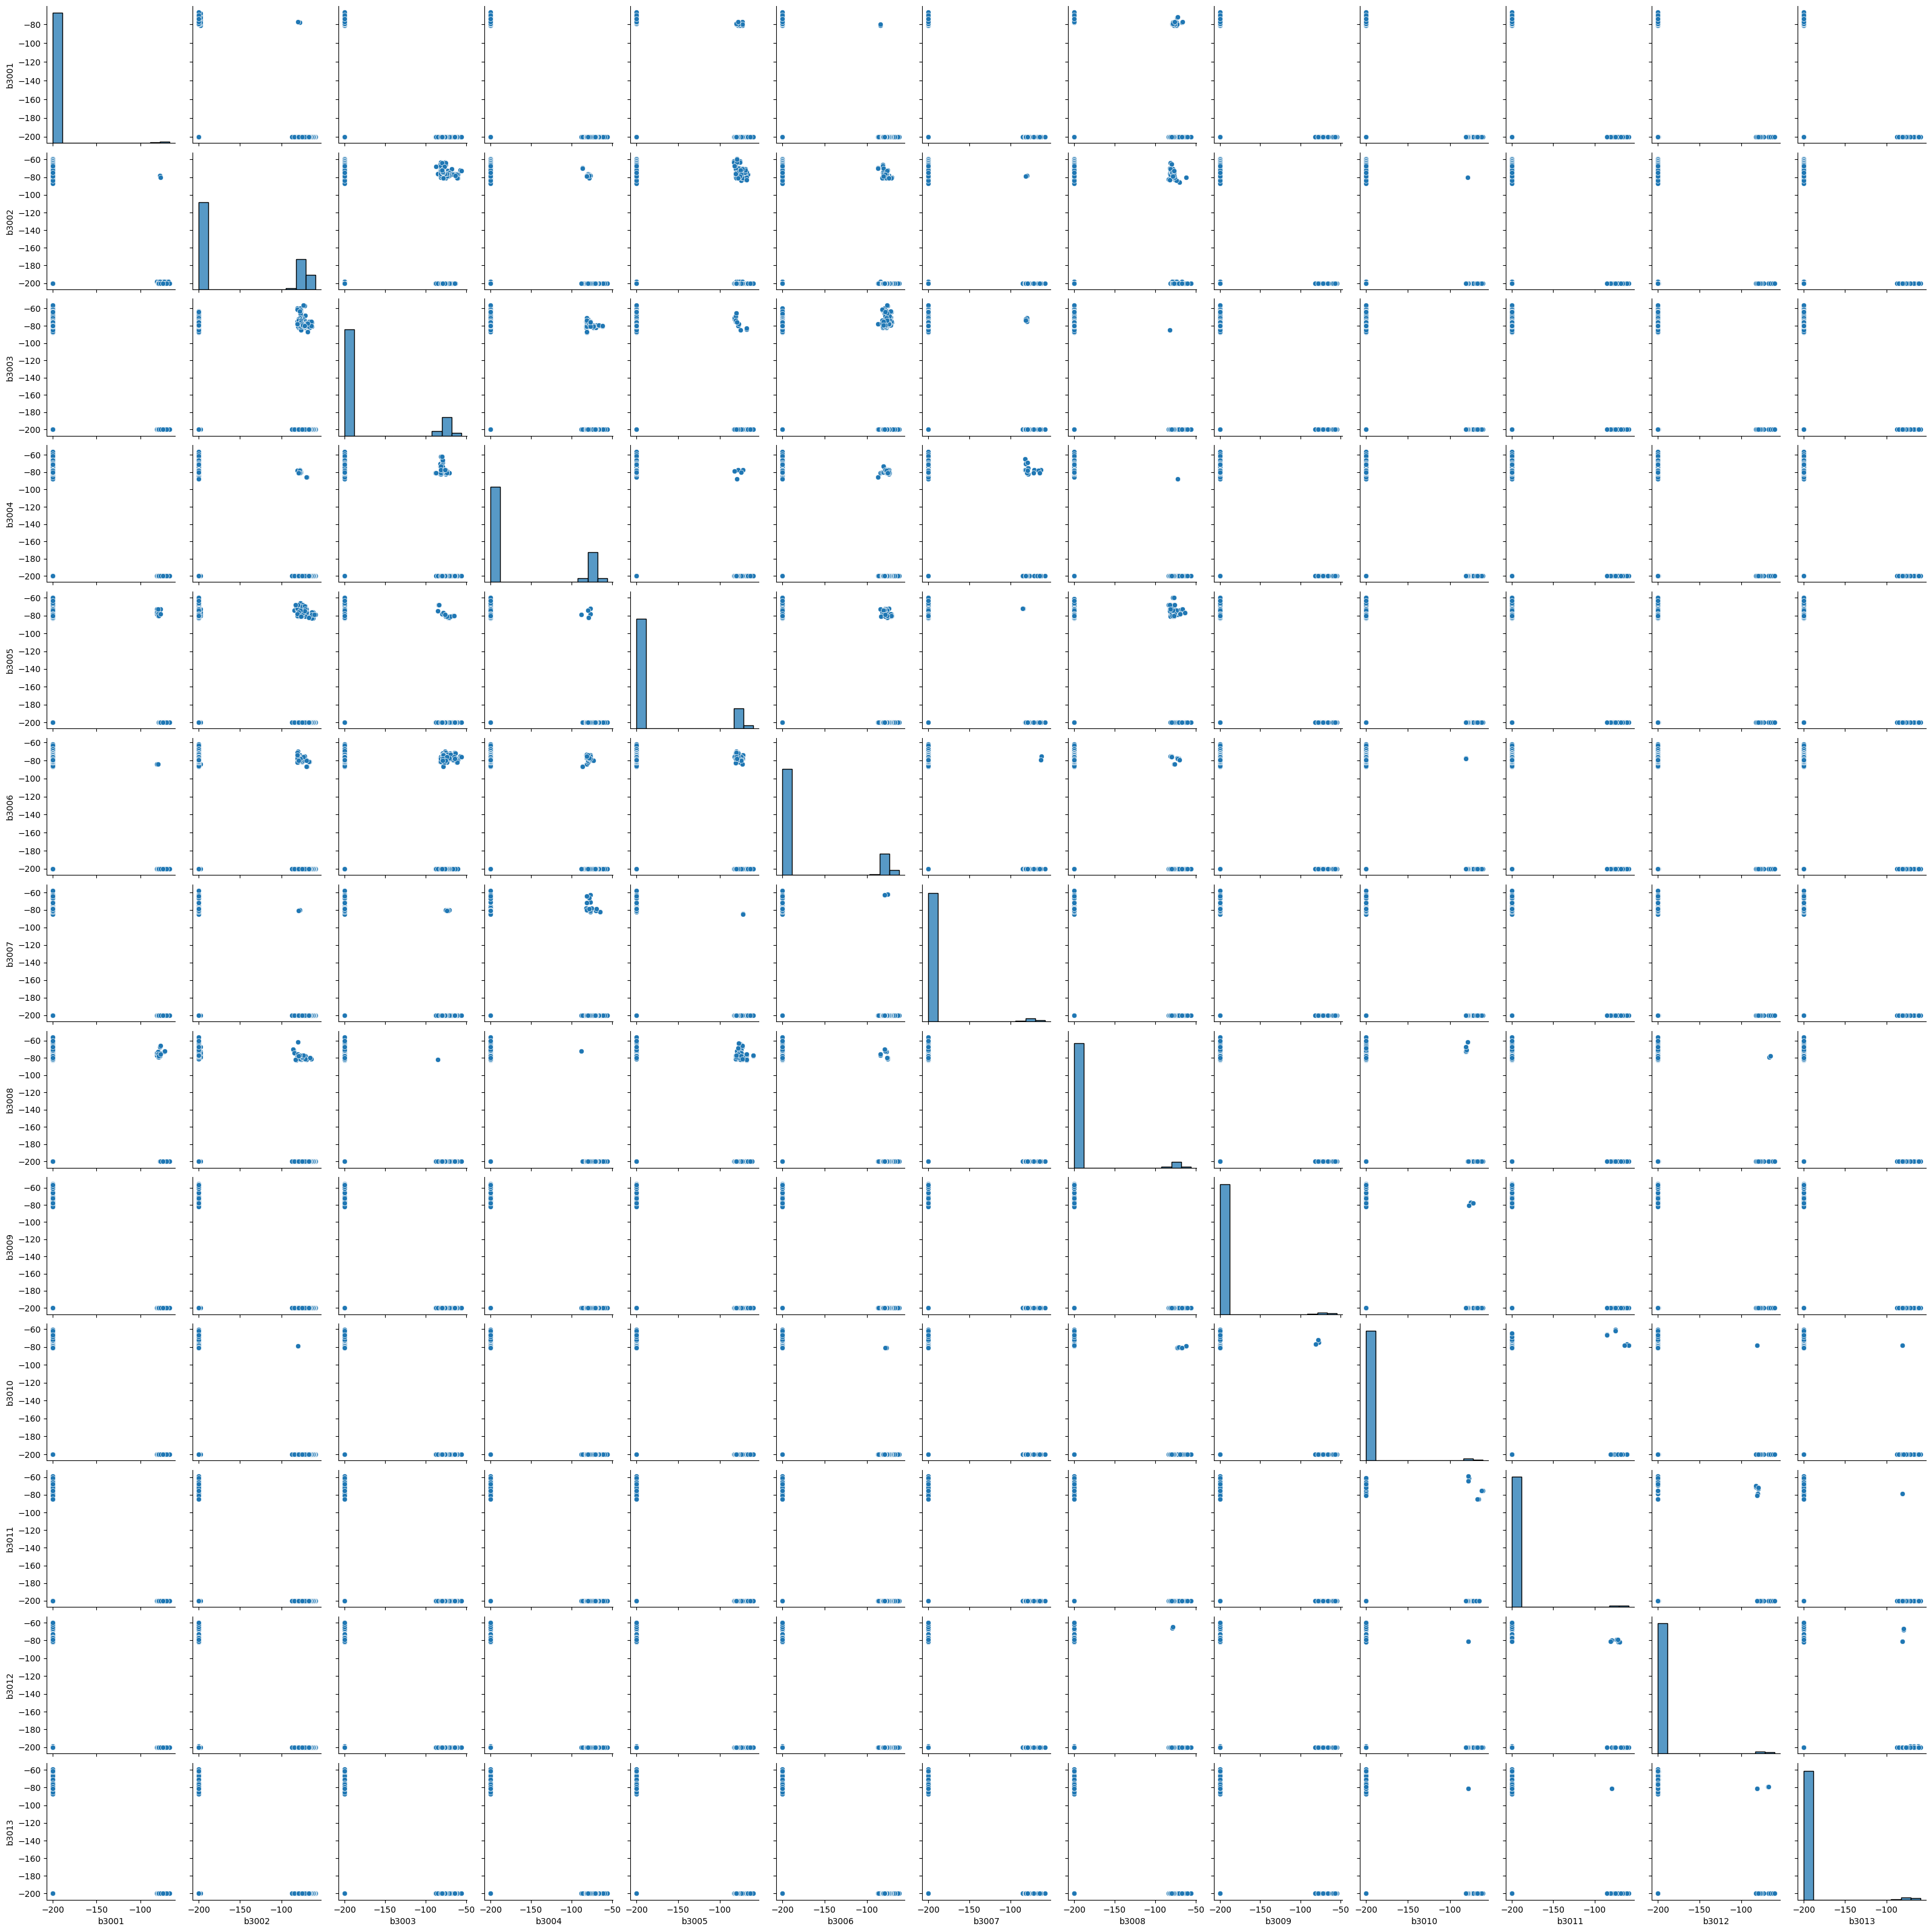

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
cols=df.columns
sns.pairplot(df[cols])
plt.show()

*Splitting data into Training & Test set*

---



In [54]:
from sklearn.model_selection import train_test_split
x = features
y = locations
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.18)

In [55]:
print("length of x_train, y_train: ", len(x_train))
print("length of x_test, y_test: ", len(x_test))

length of x_train, y_train:  1164
length of x_test, y_test:  256


**PERCEPTRON ALGORITHM**

---



In [46]:
from sklearn.linear_model import Perceptron
p=Perceptron()

In [47]:
p.fit(x_train,y_train)

Perceptron()

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
train_pred=p.predict(x_train)
test_pred=p.predict(x_test)

In [49]:
print("Training accuracy: ",accuracy_score(train_pred,y_train))
print("Testing accuracy: ",accuracy_score(test_pred,y_test))

Training accuracy:  0.12285223367697594
Testing accuracy:  0.10546875


In [50]:
print("confusion matrix:\n ", confusion_matrix(test_pred, y_test))

confusion matrix:
  [[0 0 0 ... 0 0 0]
 [2 2 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 3 5]
 [0 0 0 ... 0 0 0]]


**LOGISTIC REGRESSION**

---



In [65]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
lr_train_pred=model_lr.predict(x_train)
lr_test_pred=model_lr.predict(x_test)
print("Training accuracy of LR: ", accuracy_score(lr_train_pred, y_train))
print("Testing accuracy of LR: ", accuracy_score(lr_test_pred, y_test))

Training accuracy of LR:  0.25945017182130586
Testing accuracy of LR:  0.23828125


In [41]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Performance analysis of default Logistic Regression Model
print('Logistic regression model score (Default): ',model_lr.score(x_test, y_test))
print(classification_report(y_test, lr_test_pred, digits=3))

Logistic regression model score (Default):  0.20892018779342722
              precision    recall  f1-score   support

         D13      0.000     0.000     0.000         3
         D15      0.556     1.000     0.714         5
         E15      0.000     0.000     0.000         1
         F08      0.000     0.000     0.000         3
         G15      0.000     0.000     0.000         2
         I01      0.000     0.000     0.000         4
         I02      0.000     0.000     0.000         2
         I03      0.000     0.000     0.000         9
         I04      0.000     0.000     0.000         2
         I05      0.000     0.000     0.000         3
         I06      0.316     0.600     0.414        10
         I07      0.333     0.250     0.286         4
         I08      1.000     0.500     0.667        12
         I09      0.167     0.500     0.250         2
         I10      0.667     0.800     0.727         5
         I15      0.167     1.000     0.286         1
         J01     

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

**Logistic Regression using K Fold CV**
---



Text(0, 0.5, 'Score')

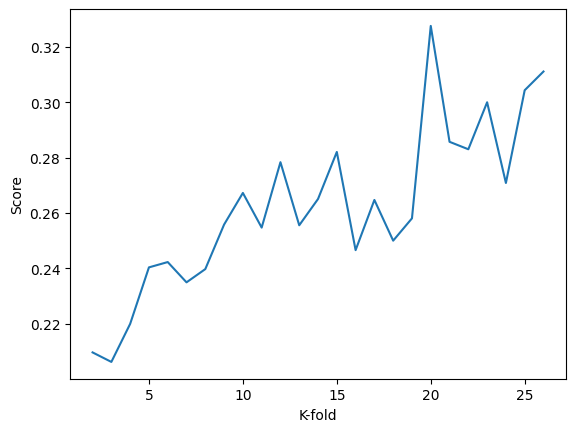

In [81]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
score = []
ary = []
for x in range (2 , 27):
    ary = cross_val_score(model_lr, x_train, y_train, cv=x)
    score.append(max(ary[:]))
    
x = np.arange(2,27,1);
y_1 = score
plt.plot(x,y_1)
plt.xlabel('K-fold')
plt.ylabel('Score')

In [82]:
cross_val_score(model_lr, x_train, y_train, cv=26)

array([0.17777778, 0.17777778, 0.17777778, 0.24444444, 0.22222222,
       0.2       , 0.26666667, 0.22222222, 0.17777778, 0.24444444,
       0.24444444, 0.24444444, 0.31111111, 0.17777778, 0.26666667,
       0.28888889, 0.28888889, 0.26666667, 0.24444444, 0.08888889,
       0.13636364, 0.18181818, 0.18181818, 0.09090909, 0.13636364,
       0.15909091])

In [83]:
#Performance analysis of Logistic regression using K-fold cross validation
predicted = cross_val_predict(model_lr, x_test, y_test)
print('Logistic regression model score (k-fold cross validation): ',accuracy_score(y_test, predicted))
print(classification_report(y_test, predicted, digits=3))

Logistic regression model score (k-fold cross validation):  0.2109375
              precision    recall  f1-score   support

         D13      0.000     0.000     0.000         1
         D15      0.667     0.667     0.667         3
         I01      0.286     0.500     0.364         4
         I02      0.000     0.000     0.000         5
         I03      0.286     0.286     0.286         7
         I04      0.000     0.000     0.000         1
         I05      0.000     0.000     0.000         4
         I06      0.667     0.667     0.667         6
         I07      0.250     0.286     0.267         7
         I08      0.000     0.000     0.000         3
         I09      0.000     0.000     0.000         1
         I10      1.000     1.000     1.000         2
         I15      0.000     0.000     0.000         1
         J01      0.000     0.000     0.000         2
         J02      0.000     0.000     0.000         5
         J03      0.000     0.000     0.000         2
         J0

**Grid Search**

---



In [85]:
from sklearn.model_selection import GridSearchCV

# Tuning parameters: Penalty & the inverse of regularization strength (C)
parameters = {'penalty':('l1', 'l2'), 'C':[5,6,7,8,9,10]}
model_lr2 = LogisticRegression()
grid_search_lr = GridSearchCV(model_lr2, parameters,cv=5)
grid_search_lr.fit(x_train,y_train)
grid_search_lr.best_params_

{'C': 10, 'penalty': 'l2'}

In [87]:
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

#PCA
#The following statement is same for all three model: 
#Logistic Rregression, Decision Tree, Ramdom Forest
pca = PCA(n_components=5) 

#SelectKbest
#The following statement is same for all three model: 
#Logistic Rregression, Decision Tree, Ramdom Forest
selection = SelectKBest(k=5)

#Combination of PCA and SelectKbest features
#The following statement is same for all three model: 
#Logistic Rregression, Decision Tree, Ramdom Forest
combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

#Logistic reression classifier
lr3 = LogisticRegression()

#pipelining
pipeline = Pipeline([("features", combined_features), ("lr3", lr3)])

#The total parameters of PCA, selectKbest and logistic regression
#Tunig parameters
    #PCA: n_components
    #SelectKbest: select_k
    #Logistic regression: C & penalty
param_grid = dict(features__pca__n_components= [5,10],
                  features__univ_select__k=[5,10],
                  lr3__C=[5,7],lr3__penalty=['l1','l2'])

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv = 3)
grid_search.fit(x_train, y_train)# Fitting the training data
print(grid_search.best_params_)# Best logistic regression params

{'features__pca__n_components': 5, 'features__univ_select__k': 10, 'lr3__C': 7, 'lr3__penalty': 'l2'}


In [88]:
print(grid_search.best_estimator_)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=5)),
                                                ('univ_select',
                                                 SelectKBest())])),
                ('lr3', LogisticRegression(C=7))])


In [89]:
#Performance analysis of Logistic Regression using PCA, SlectKbest and GridSearchCV
prediction = grid_search.predict(x_test)
print('Logistic regression model score (Pipeline): ',accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction, digits=3))

Logistic regression model score (Pipeline):  0.00390625
              precision    recall  f1-score   support

         D13      0.000     0.000     0.000         1
         D15      0.000     0.000     0.000         3
         I01      0.000     0.000     0.000         4
         I02      0.000     0.000     0.000         5
         I03      0.000     0.000     0.000         7
         I04      0.000     0.000     0.000         1
         I05      0.000     0.000     0.000         4
         I06      0.000     0.000     0.000         6
         I07      0.000     0.000     0.000         7
         I08      0.000     0.000     0.000         3
         I09      0.000     0.000     0.000         1
         I10      0.000     0.000     0.000         2
         I15      0.000     0.000     0.000         1
         J01      0.000     0.000     0.000         2
         J02      0.000     0.000     0.000         5
         J03      0.000     0.000     0.000         2
         J04      0.000  

In [104]:
g_train_pred=p.predict(x_train)
g_test_pred=p.predict(x_test)
print("Training accuracy: ",accuracy_score(g_train_pred,y_train))
print("Testing accuracy: ",accuracy_score(g_test_pred,y_test))

**DECISION TREE CLASSIFIER**


---



In [90]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [93]:
#Performance analysis of default Decision tree model
print('Decision tree model score (Default): ', model_dt.score(x_test, y_test))
print(classification_report(y_test, model_dt.predict(x_test), digits=3))

Decision tree model score (Default):  0.0234375
              precision    recall  f1-score   support

         D13      0.000     0.000     0.000         1
         D15      0.000     0.000     0.000         3
         I01      0.000     0.000     0.000         4
         I02      0.000     0.000     0.000         5
         I03      0.000     0.000     0.000         7
         I04      0.000     0.000     0.000         1
         I05      0.000     0.000     0.000         4
         I06      0.000     0.000     0.000         6
         I07      0.000     0.000     0.000         7
         I08      0.000     0.000     0.000         3
         I09      0.000     0.000     0.000         1
         I10      0.000     0.000     0.000         2
         I15      0.000     0.000     0.000         1
         J01      0.000     0.000     0.000         2
         J02      0.000     0.000     0.000         5
         J03      0.000     0.000     0.000         2
         J04      0.000     0.000

Text(0, 0.5, 'Score')

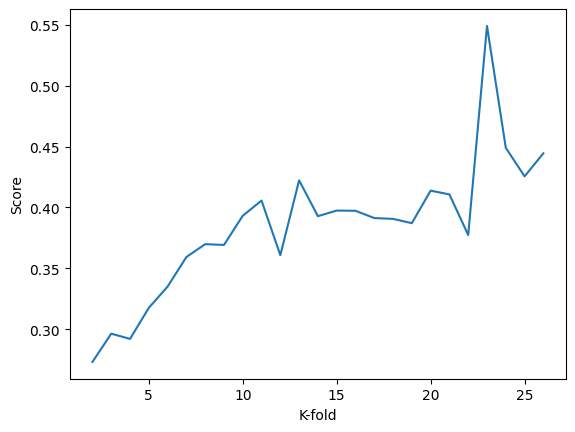

In [95]:
#Decision tree model using K-fold CV
score = []
ary = []
for x in range (2 , 27):
    ary = cross_val_score(model_dt, x_train, y_train, cv=x)
    score.append(max(ary[:]))
    
x = np.arange(2,27,1);
y_1 = score
plt.plot(x,y_1)
plt.xlabel('K-fold')
plt.ylabel('Score')

In [100]:
#Tuning parameters: criterion & max_depth
import numpy as np
parameters = {'criterion':('gini', 'entropy'), 'max_depth':np.arange(1,50)}
dTree = GridSearchCV(DecisionTreeClassifier(), parameters, cv =24)
dTree.fit(x_train,y_train)
dTree.best_params_

{'criterion': 'gini', 'max_depth': 43}

In [110]:
tree_search = GridSearchCV(pipeline, param_grid=param_grid, cv = 5)
tree_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('pca',
                                                                        PCA(n_components=5)),
                                                                       ('univ_select',
                                                                        SelectKBest(k=5))])),
                                       ('lr3', LogisticRegression())]),
             param_grid={'features__pca__n_components': [5, 10],
                         'features__univ_select__k': [5, 10], 'lr3__C': [5, 7],
                         'lr3__penalty': ['l1', 'l2']})

In [106]:
tree_train_pred=p.predict(x_train)
tree_test_pred=p.predict(x_test)
print("Training accuracy: ",accuracy_score(tree_train_pred,y_train))
print("Testing accuracy: ",accuracy_score(tree_test_pred,y_test))

Training accuracy:  0.18127147766323023
Testing accuracy:  0.109375


**RANDOM FOREST CLASSIFIER**

---



In [102]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

Text(0, 0.5, 'Score')

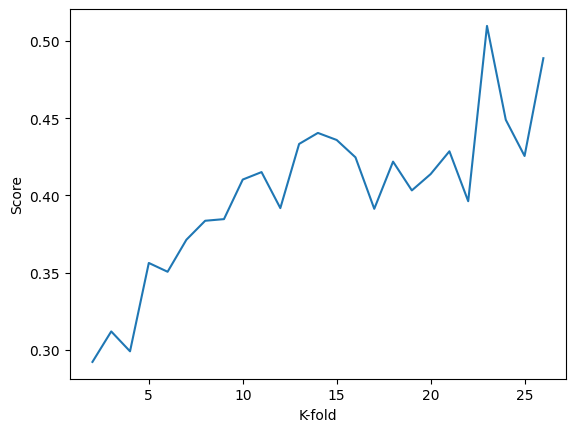

In [103]:
#Random forest model using K-fold CV
score = []
ary = []
for x in range (2 , 27):
    ary = cross_val_score(model_rf, x_train, y_train, cv=x)
    score.append(max(ary[:]))
    
x = np.arange(2,27,1);
y_1 = score
plt.plot(x,y_1)
plt.xlabel('K-fold')
plt.ylabel('Score')

In [108]:
rf = RandomForestClassifier(bootstrap = True,n_jobs = -1)
grid_search_rf = GridSearchCV(rf, parameters,cv=8)
grid_search_rf.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

Comparison of Results

---



In [111]:
#tree_search.fit(x_train,y_train)
y_pred = tree_search.predict(x_test)
print('Decision Tree Grid Search CV with PCA:',accuracy_score(y_test,y_pred))
#dTree.fit(x_train,y_train)
y_pred = dTree.predict(x_test)
print('Decision Tree Grid Search CV without PCA::',accuracy_score(y_test,y_pred))
#grid_search_rf.fit(x_train,y_train)
y_pred = grid_search_rf.predict(x_test)
print('Random Forest Tree Grid Search without PCA:',accuracy_score(y_test,y_pred))

Decision Tree Grid Search CV with PCA: 0.0078125
Decision Tree Grid Search CV without PCA:: 0.0078125
Random Forest Tree Grid Search without PCA: 0.015625
